---
---

# 1. Setup

---
---

### Import the relevant packages

In [ ]:
import os
from google.colab import drive
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split

import keras.backend as K
import tensorflow as tf

# Configuring settings for plotting
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

### Mount the drive

In [ ]:
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/College - 4th Year/CA4015_AdvancedML/Assignment_3/new/notebooks/data') # Liam
# os.chdir("/content/drive/MyDrive/Assignment_3/new/notebooks/data")                                         # Adam & Nathan                               

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Set the maximum number of rows and columns seen in the output

In [ ]:
pd.set_option('max_rows', 100)
pd.set_option('max_columns', 25)

---
---

# 2. Loading the data

---
---

The data has been prepared in the data_prep notebook. Here, we simply read in the data which has been processed in that notebook. The DataFrame's below contain various different features which we wish to experiment with in our forecasting models.



### Loading in the train, validation, test and full DataFrames

In [ ]:
cropped_and_author_train_df = pd.read_csv('std_1_train.csv', header=0)
cropped_and_author_val_df = pd.read_csv('std_1_val.csv', header=0)
cropped_and_author_test_df = pd.read_csv('std_1_test.csv', header=0)

cropped_and_author_full_df = pd.read_csv('std_1_full.csv', header=0)

### Inspect data

In [ ]:
cropped_and_author_train_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,-1.601686,2.343046,-1.304122,1.648084,0.251126,8.607776,0,-1.601686,0.480706,5.530874,2.452504,0,46343
1,-1.597980,3.339652,-1.513119,1.612262,0.111929,4.815162,0,-1.597980,0.451398,4.483025,2.442553,0,46343
2,-1.594274,2.524247,-0.006384,1.979267,1.727603,0.891768,0,-1.594273,0.398636,3.124169,2.432611,0,46343
3,-1.590567,1.618243,-0.679271,-0.327864,1.896059,-0.154470,0,-1.590567,0.374122,2.640312,2.422674,0,46343
4,-1.586861,1.708843,-0.591184,-0.311630,1.923702,-0.154470,0,-1.586861,0.354029,3.032657,2.412742,0,46343


In [ ]:
cropped_and_author_val_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,0.577567,0.213935,-1.495124,0.498384,-0.562286,-0.15447,5,0.577567,0.192422,-0.257536,-1.046431,5,8000685
1,0.581274,-0.012566,-1.500876,0.489463,-0.558278,-0.15447,5,0.581273,0.557916,-0.257536,-1.046691,5,8000685
2,0.584980,0.757538,-1.497220,0.510753,-0.569202,-0.15447,5,0.584980,0.686721,-0.257536,-1.046927,5,8000685
3,0.588686,0.576337,-1.516553,0.462067,-0.561459,-0.15447,5,0.588686,0.703659,-0.257536,-1.047140,5,8000685
4,0.592392,-0.057866,-1.508682,0.465067,-0.560373,-0.15447,5,0.592392,0.704723,-0.257536,-1.047334,5,8000685


In [ ]:
cropped_and_author_test_df.head()

,time,heart_rate,x_motion,y_motion,z_motion,step_count,sleep_label,time_feature,heart_rate_feature,count_feature,cosine_feature,psg_label,subject_id
0,-1.471969,-0.284367,-1.286817,0.891131,-0.572212,-0.15447,2,-1.471968,-0.637137,-0.257536,2.108055,2,9106476
1,-1.468262,0.032734,-1.286729,0.883695,-0.574001,-0.15447,2,-1.468262,-0.649877,-0.257536,2.098340,2,9106476
2,-1.464556,-0.103166,-1.291255,0.895584,-0.569009,-0.15447,3,-1.464556,-0.685912,-0.257536,2.088630,3,9106476
3,-1.460850,-0.012566,-1.279770,0.894115,-0.570333,-0.15447,3,-1.460850,-0.700504,-0.257536,2.078929,3,9106476
4,-1.457144,0.078035,-1.286973,0.885210,-0.568240,-0.15447,2,-1.457144,-0.709255,-0.257536,2.069237,2,9106476


### Extracting the cropped features

Here, we create a DataFrame which contains only the cropped and resampled *raw* data.

In [ ]:
cropped_features = ['subject_id', 'time', 'heart_rate', 'x_motion', 'y_motion', 'z_motion', 'step_count', 'sleep_label']

cropped_train_df = cropped_and_author_train_df[cropped_features].rename(columns={'sleep_label': 'psg_label'})
cropped_val_df = cropped_and_author_val_df[cropped_features].rename(columns={'sleep_label': 'psg_label'})
cropped_test_df = cropped_and_author_test_df[cropped_features].rename(columns={'sleep_label': 'psg_label'})

cropped_full_df = cropped_and_author_full_df[cropped_features].rename(columns={'sleep_label': 'psg_label'})

### Extracting the features used by Walch et al.

In the paper associated with the sleep study data [1], the authors proposed a set of features which achieved good classification results. We intend to experiment with these features for the purpose of forecasting.

These features were constructed using code available on the [Github associated with the 
paper](https://github.com/ojwalch/sleep_classifiers). Briefly, the features they propose are:

*   **"*Clock proxy*" feature** $\Rightarrow$ This feature served to approximate the changing drive of the circadian clock to sleep over the course of the night. This was implemented using a *fixed cosine wave*, shifted relative to the time of recording start, which rose and fell over the course of the night.
*   **Heart rate feature** $\Rightarrow$ Walch et al. smoothed and filtered the resampled heart rate signal to amplify periods of high change by convolving with a difference of Gaussians filter. Each individual was also normalized by dividing by the 90th percentile in the absolute difference between each heart rate measurement and the mean heart rate over the sleep period. The standard deviation in the window around the scored epoch was used as the representative feature for heart rate.
*   **Activity count feature** $\Rightarrow$ Walch et. al converted the raw acceleration data to activity counts using MATLAB code available in the aformentioned Github repository. This code was validated in [2] by Lindert et. al.
*   **Time feature** $\Rightarrow$ Walch et al. simply represented time in terms of hours since the beginning of the PSG study.

In [ ]:
author_features = ['subject_id', 'time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']

author_train_df = cropped_and_author_train_df[author_features]
author_val_df = cropped_and_author_val_df[author_features]
author_test_df = cropped_and_author_test_df[author_features]

author_full_df = cropped_and_author_full_df[author_features]

### Define which DataFrame of features we want to use

To begin with, we will experiment using the features proposed by Walch et al. [1].

In [ ]:
train_df = author_train_df
val_df = author_val_df
test_df = author_test_df

full_df = author_full_df

---
---

# 3. Data Windowing

---
---

The models which we intend to build will make a set of predictions based on a window of consecutive samples from the data. Defining a **WindowGenerator** class which can handle the different types of forecasting which we intend to do will be useful. The main information contained in this class will be:


*   The width (or number of time steps) of the input and label windows.
*   The time offset between these.
*   Which features are used as inputs, labels, or both.





### Define the WindowGenerator class

The WindowGenerator class below:

*   Handles the indexes and offsets of the input and label windows.
*   Handles cases where subjects overlap so as to prevent predictions which forecast a subject based on another subjects data.
*   Splits the windows of features into (features, labels) pairs.
*   Plots the content of the resulting windows.
*   Efficiently generates batches of these windows from the training, validation and test data, using Tensorflow Dataset objects (tf.data.Dataset's).

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None, id_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # ID column is used to ensure windows dont overlap
    self.id_columns = id_columns

    self.input_columns = [c for c in train_df.columns if c not in self.id_columns]

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Input column name(s): {self.input_columns}',
        f'Label column name(s): {self.label_columns}',
        f'ID column name(s): {self.id_columns}'])

In [ ]:
column_indices = {name: i for i, name in enumerate(train_df.columns)}
num_features = train_df.shape[1]
num_classes = 6

### Choosing window length

The choice of input and label size is arbitrary and provides something which we can experiment with later on.

To begin with, we are going to test windows which have 100 input timesteps in an attempt to predict the next 10 timesteps (*input_width = 100* & *label_width* = 10).

In [ ]:
w1 = WindowGenerator(input_width=100, label_width=10, shift=10, label_columns=['psg_label'], id_columns=["subject_id"])
w1

Total window size: 110
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Label indices: [100 101 102 103 104 105 106 107 108 109]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

### Splitting the window

Given a list of consecutive input timesteps, the *split_window* method will convert them to a window of inputs and a window of labels.

In [ ]:
def split_window(self, features):
  # Split input features
  inputs = features[:, self.input_slice, :]
  inputs = tf.stack([inputs[:, :, self.column_indices[name]] for name in self.input_columns], axis=-1)

  # Split target labels
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)


  return inputs, labels

WindowGenerator.split_window = split_window

The variable *example_window* below contains three windows each with input width and label width of 100 and 10 respectively. The first starts at index 0, the second at index 100 and the third at 200.

In [ ]:
# Stack three slices, the length of the total window
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 110, 6)
Inputs shape: (3, 100, 5)
labels shape: (3, 10, 1)


The leftmost index in this case is the "*batch*" dimension, which in the case of our example is 3, representing the 3 windows. The middle indices are the "*time*" dimension, which in this case represents the number of time steps in each. The rightmost indices are the number of features; we use 6 features in the input to predict the 1 psg_label feature in the label window. 

### Plotting windows

We define a plot method below which allows us to visualise the split windows.

In [ ]:
def plot(self, model=None, plot_col='psg_label', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.input_columns.index(plot_col)
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel("PSG Label")
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = np.argmax(model(inputs).cpu().numpy(), axis=-1)
      plt.scatter(self.label_indices, predictions[n, :],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time')

WindowGenerator.plot = plot

To give a quick demo of what these plots look like, we plot the three example windows from above.

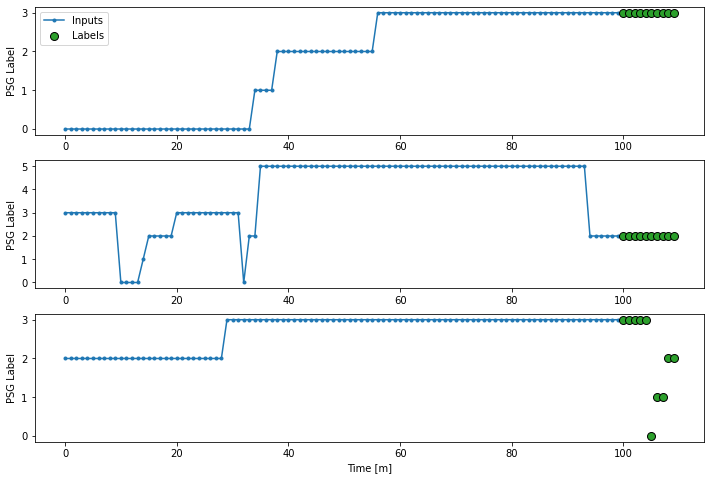

In [ ]:
w1.example = example_inputs, example_labels
w1.plot()

### Create TF Datasets

This *make_dataset* method will take a time series DataFrame and convert it to a tf.data.Dataset of (input_window, label_window) pairs using the preprocessing.timeseries_dataset_from_array function.

It first splits up the dataset by subject, then converts each to a sliding window dataset. Finally we concatenate the datasets together. This allows us to avoid overlapping windows between subjects.  

In [ ]:
def make_dataset(self, data: pd.DataFrame):
  # Split by subject and window
  datasets = []
  for id, df in data.groupby(self.id_columns):
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=df.values.astype(np.float32),
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)
    datasets.append(ds)

  # Concatenate
  ds = datasets[0]
  for ds2 in datasets[1:]:
    ds = ds.concatenate(ds2)

  return ds

WindowGenerator.make_dataset = make_dataset

Adding some properties to the WindowGenerator Class in order to be able to access the train, val and test sets. Also adding a standard example batch for easy access and plotting.

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 100, 5)
Labels shape (batch, time, features): (32, 10, 1)


---
---

# 4. Single-step Input Models

---
---

The simplest time series forecasting model you can build predicts a single feature's value, in this case the 'psg_label', 1 timestep into the future (30s) based only on the current conditions.

Here we configure a WindowGenerator object which produces these single-step (input, label) pairs from the dataset.

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['psg_label'], id_columns=['subject_id'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

The WindowGenerator object creates tf.data.Datasets from the training, validation and test sets, allowing for easy iteration over batches of data.

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


### Defining a loss function

Here, we define the focal loss function [3] which we will use for model training. This is an extension of the traditional categorical crossentropy loss whichs adds an additional "focal" term. This term puts more weight on examples that the model has low confidence on, which helps classification of imbalanced datasets.
It is given by:

$$FL(p_t) =  - (1 - p_t)^\alpha log(p_t)$$  
Where $p_t$ is the model's predicted probability of the ground truth class and $\alpha$ is the focal term.  
We will use a default $\alpha$ value of 2 which is suggested as a good default by the authors.

In [ ]:
def focal(a=2):
  def loss(y_true, y_pred):
    y_true = tf.squeeze(y_true)
    y_true = tf.one_hot(tf.cast(y_true, tf.uint8), y_pred.shape[-1])

    logits = - y_true * (1 - y_pred) ** a * K.log(y_pred + K.epsilon())

    return K.mean(logits)

  return loss

## Baseline Model

Before building a trainable model it would be good to have a performance baseline as a point for comparison with the later more complicated models.

This first task is to predict *psg_label* 30s in the future given the current value of all features. The current values include the current *psg_label*.

So to start, we build a model that just returns the current *psg_label* as the prediction, predicting "No change". This is a reasonable baseline since *psg_label* changes slowly.

In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    last = tf.cast(inputs[:, :, self.label_index], tf.uint8) # Select the last value
    return tf.one_hot(last, 6) # Convert to a one-hot vector

Instantiate the model and evaluate the performance.

In [ ]:
baseline = Baseline(label_index=single_step_window.input_columns.index("psg_label"))

baseline.compile(loss=focal(2),
                 metrics=["accuracy"])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

165/165 [==============================] - 1s 5ms/step - loss: 1.7746 - accuracy: 0.8960


The baseline actually proves to be a decent model with an accuaracy score of 89.6%.

We can visualise the performance of the model through the plot funtion of the WindowGenerator Class. This plot would not be very informative when only visualising a single input and label pair.

So, below we create a wider WindowGenerator object that generates 10 minute windows of consecutive inputs and labels at a time. This doesn't change how the model operates, it still makes predictions 30s into the future based on a single input time step, just now we can see more of the predictions at once.

In [ ]:
wide_window = WindowGenerator(
    input_width=20, label_width=20, shift=1,
    label_columns=['psg_label'], id_columns=["subject_id"])

wide_window

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

We can then simply pass this window directly to the Baseline model without any code changes.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 20, 5)
Output shape: (32, 20, 6)


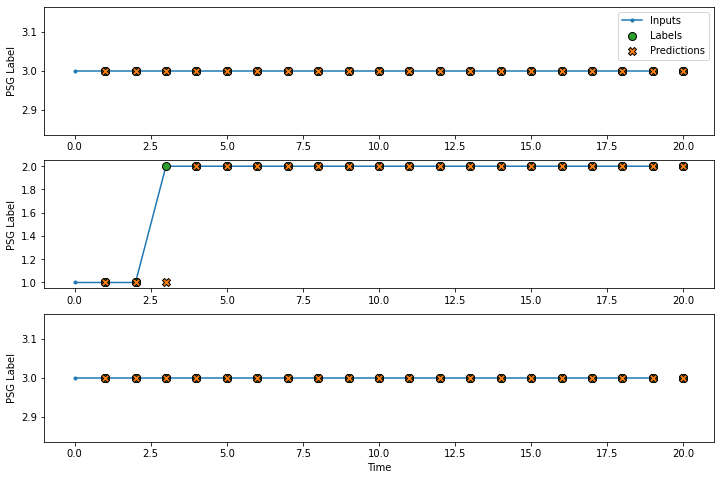

In [ ]:
wide_window.plot(baseline)

In the above plots which use the example batches, the single step model is run over the course of 10 minutes in each. This deserves some more explanation:

* The blue "Inputs" line shows the input *psg_label* at each time step. The actual model recieves all of the features, this plot only shows the one input feature, the *psg_label*.
* The green "Labels" dots show the target prediction value. These dots are shown at the prediction time, not the input time. That is why the range of labels is shifted 1 step relative to the inputs.
* The orange "Predictions" crosses are the model's prediction's for each output time step. If the model were predicting perfectly the predictions would land directly on the green "labels".

## Linear Model

The simplest trainable model which can be applied to this task is to insert a linear transformation between the input and output. A Dense layer in keras is used for this. This layer trains a linear regression for each class, conditioned on the input variables. We use a Softmax activation which simply combines the output from the dense layer into a probability for each class.

In this case, the output from a time step only depends on that step.

In [ ]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=num_classes),
    tf.keras.layers.Softmax()
])

If we have a Dense layer with no activation function, this is essentially a linear model. This layer transforms the last axis of the data from (batch, time, inputs) to (batch, time, units).

In [ ]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 6)


As we will train many models, we are going to package the training procedure into a function. We use an early stopping callback to determine when our models start to overfit. This stops training if the accuracy on the validation set begins to decrease.

For training, we use the focal loss function mentioned above which the model tries to minimise using the Adam optimiser. We also record the accuracy of the model during training.  

In [ ]:
def compile_and_fit(model, window, patience=4, epochs=20):
  # Stops training when validation loss stops improving
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                    patience=patience, 
                                                    restore_best_weights=True)

  model.compile(loss=focal(2),
                optimizer=tf.optimizers.Adam(),
                metrics=["accuracy"])

  history = model.fit(window.train, epochs=epochs,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

Train linear model and evaluate performance.

In [ ]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
574/574 [==============================] - 4s 6ms/step - loss: 0.1886 - accuracy: 0.4276 - val_loss: 0.1636 - val_accuracy: 0.4019
Epoch 2/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1515 - accuracy: 0.4406 - val_loss: 0.1512 - val_accuracy: 0.4677
Epoch 3/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1461 - accuracy: 0.4898 - val_loss: 0.1487 - val_accuracy: 0.4703
Epoch 4/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1444 - accuracy: 0.4948 - val_loss: 0.1479 - val_accuracy: 0.4703
Epoch 5/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1436 - accuracy: 0.4949 - val_loss: 0.1479 - val_accuracy: 0.4703
Epoch 6/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1433 - accuracy: 0.4951 - val_loss: 0.1475 - val_accuracy: 0.4703
Epoch 7/20
165/165 [==============================] - 1s 4ms/step - loss: 0.1485 - accuracy: 0.4703


Like the baseline model, the linear model can be called on batches of wide windows. Used this way the model makes a set of independent predictions on consecuitive time steps. There are no interactions between the predictions at each time step.

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 20, 5)
Output shape: (32, 20, 6)


Here is the plot of its example predictions on the wide_window; in this case, the linear model actually performs worse than the baseline model.

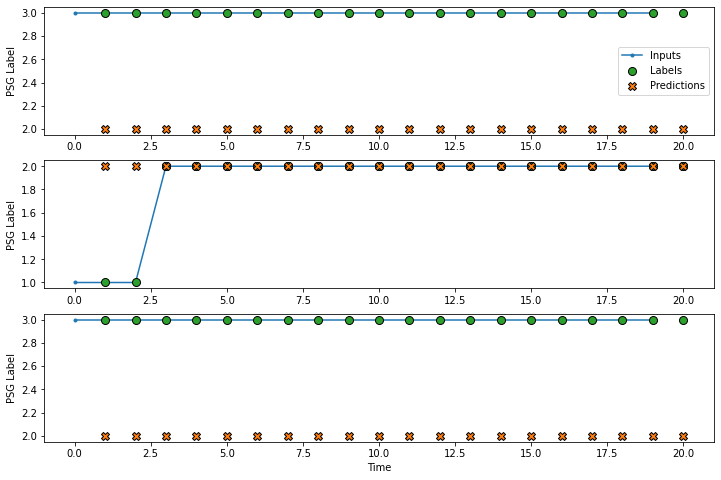

In [ ]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights, and see the weight assigned to each input.

Here we have the weights that were learned for each class. Feature weights that have a bigger magnitude (even if they are negative) play a bigger role in determining if it is that class or not.  

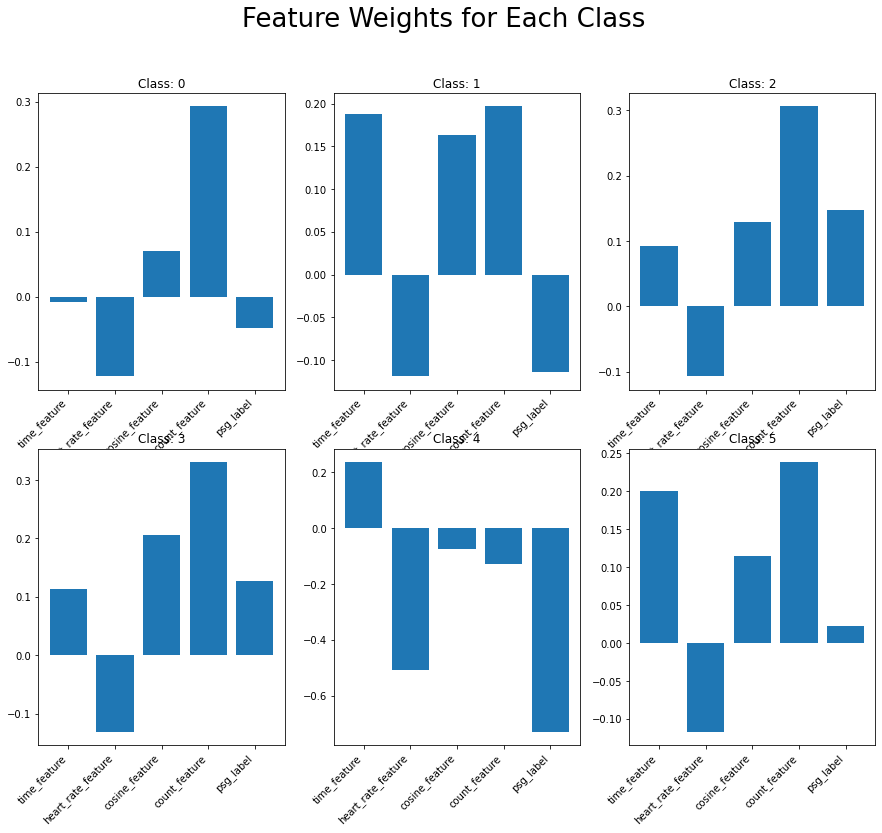

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 12))
for i in range(num_classes):
  row, col = divmod(i, 3)
  ax[row, col].bar(x=range(5), 
          height=linear.layers[0].kernel[:,i].numpy())
  
  ax[row, col].set_xticklabels(train_df.columns, rotation=45, ha="right")
  ax[row, col].set_title(f"Class: {i}")

fig.suptitle("Feature Weights for Each Class", fontsize="26")
plt.show()

It can be seen that in the linear model, for most classes, the models places the most importance on the previous activity count feature in order to predict the next psg_label. Realistically, more weight should probably be given to the previous psg_label for prediction. This could be a shortcoming of *random initialisation*.

We will now experiment with more complex models to see if this will improve performance.

## Multi-Layer Perceptron

The MLP model is the simplest type of neural network. It cascades multiple Dense layers with an activation function in between. This allows the model to fit to non-linear relationships which the linear model cannot. 

In this case we use two "hidden" layers of 64 units each, and the ReLU activation function.  

In [ ]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_classes),
    tf.keras.layers.Softmax()
])

history = compile_and_fit(dense, single_step_window)

val_performance['MLP'] = dense.evaluate(single_step_window.val)
performance['MLP'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
574/574 [==============================] - 4s 7ms/step - loss: 0.1442 - accuracy: 0.5097 - val_loss: 0.1482 - val_accuracy: 0.4706
Epoch 2/20
574/574 [==============================] - 3s 6ms/step - loss: 0.1408 - accuracy: 0.5162 - val_loss: 0.1469 - val_accuracy: 0.4703
Epoch 3/20
574/574 [==============================] - 4s 6ms/step - loss: 0.1406 - accuracy: 0.5157 - val_loss: 0.1481 - val_accuracy: 0.4703
Epoch 4/20
574/574 [==============================] - 4s 6ms/step - loss: 0.1405 - accuracy: 0.5110 - val_loss: 0.1481 - val_accuracy: 0.4703
Epoch 5/20
165/165 [==============================] - 1s 4ms/step - loss: 0.1482 - accuracy: 0.4706


The performamce does not improve greatly compared to the baseline or linear models, yielding an accuracy of 47.03%.

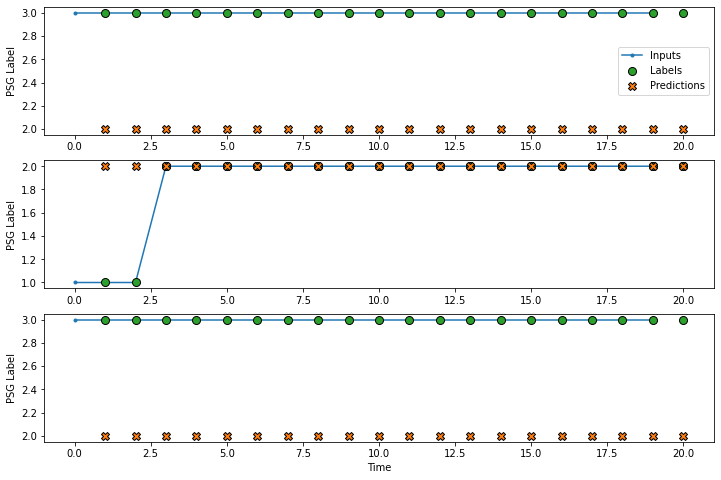

In [ ]:
wide_window.plot(dense)

---
---

# 5. Multi-step Input Models

---
---

So far we have not incorporated any temporal information into our models, we have only been predicting based on a single timestep. The model cannot see how the input features are changing over time. 

To address this issue, we create a new WindowGenerator instance, which this time produces 5 timesteps as input and a single future timestep to be predicted. The baseline, linear and MLP models handled each time step independently whereas the following models will take multiple time steps as input to produce a single output.

In [ ]:
CONV_WIDTH = 5
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['psg_label'], id_columns=["subject_id"])

conv_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [5]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

Visualising the example batches...

Text(0.5, 1.0, 'Given 2m30s as input, predict 30s into the future.')

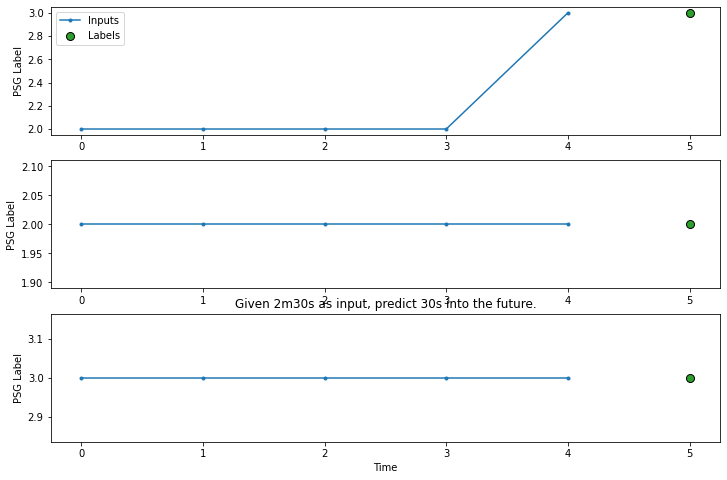

In [ ]:
conv_window.plot()
plt.title("Given 2m30s as input, predict 30s into the future.")

## Multi-Layer Perceptron

We can adapt our simple MLP model which we used above to our multi-input data. To do this we flatten out all of the input data and feed all of the features in at once. Again we predict a single sleep state in the future.  

In [ ]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=6),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
    tf.keras.layers.Softmax()
])

In [ ]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 5, 5)
Output shape: (32, 1, 6)


In [ ]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi-step MLP'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi-step MLP'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

164/164 [==============================] - 1s 4ms/step - loss: 0.1505 - accuracy: 0.4728


We only achieve a very slight increase in accuracy when multiple time steps are fed as input.

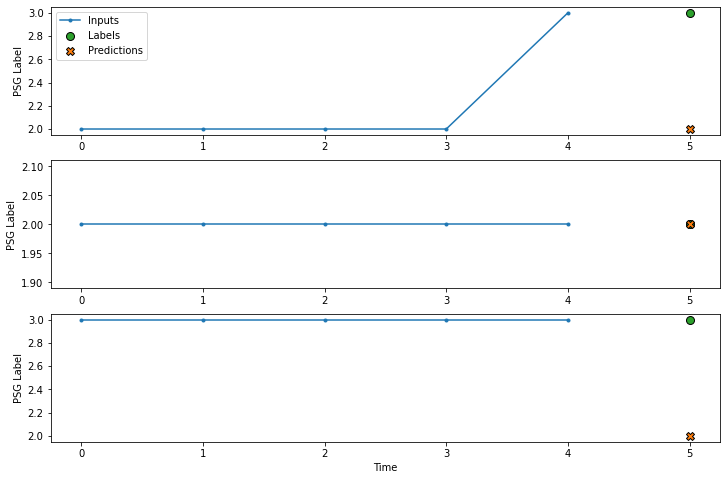

In [ ]:
conv_window.plot(multi_step_dense)

## Convolutional Neural Network

The next type of model is the Convolutional Neural Network. This explicitly takes the time dimension into account, learning patterns in the last few timesteps.

The convolutional model is quite similar to the multi-step MLP except:

*   The Flatten layer and the first Dense layer are replaced by a Convolutional layer.
*   The Reshape layer is no longer necessary since the convolution keeps the time axis in its output.



In [ ]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=6),
    tf.keras.layers.Softmax()
])

Running on an example batch to make sure the model produces outputs with the expected shape...

In [ ]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 5, 5)
Output shape: (32, 1, 6)


In [ ]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

164/164 [==============================] - 1s 4ms/step - loss: 0.1497 - accuracy: 0.4728


Very similar performance to the multi-step MLP model is achieved, yielding no improvement.

To more easily view the results of the models, we once again can define a "wide" version of our WindowGenerator instance.  

In [ ]:
LABEL_WIDTH = 20
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['psg_label'], id_columns=["subject_id"])

wide_conv_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

In [ ]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 24, 5)
Labels shape: (32, 20, 1)
Output shape: (32, 20, 6)


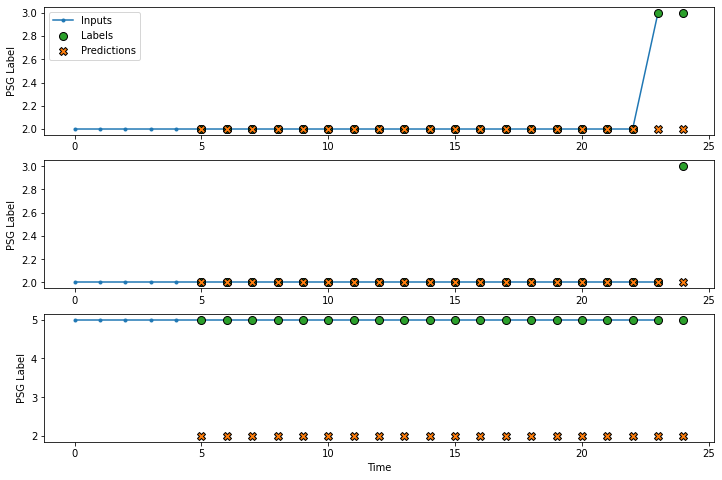

In [ ]:
wide_conv_window.plot(conv_model)

Note here how the model uses the first 5 input time steps before the first prediction and does so for all of the rest of the predicitons also.

## Recurrent Neural Network

The Recurrent Neural Network is a network specifically designed to work on time-series data. It works by sliding across the input window, making predictions at each step. It keeps an internal memory or "state" which it uses to remember time related dependencies. 

The model we intend to use is a specific RNN, called a Long Short Term Memory network. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs.

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=6),
    tf.keras.layers.Softmax()
])

An important constructor argument for all keras RNN layers is the *return_sequences* argument. This setting can configure the LSTM layer in one of two ways.

1.   If **False**, the default, the layer only returns the output of the final timestep, giving the model time to warm up its internal state before making a single prediction.
2.   If **True**, the layer returns an output for each input. This is useful for:
   - Stacking RNN layers.
   - Training a model on multiple timesteps simultaneously.

We have decided to set return_sequences = True so that the model can be trained on 10 minutes of data at a time using the wide_window object.

Checking input and output shape...

In [ ]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 20, 5)
Output shape: (32, 20, 6)


In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

161/161 [==============================] - 1s 6ms/step - loss: 0.0312 - accuracy: 0.8870


The LSTM model produces the best accuracy by far out of the multi-step models which we have experimented with, yielding 88.7% accuracy.

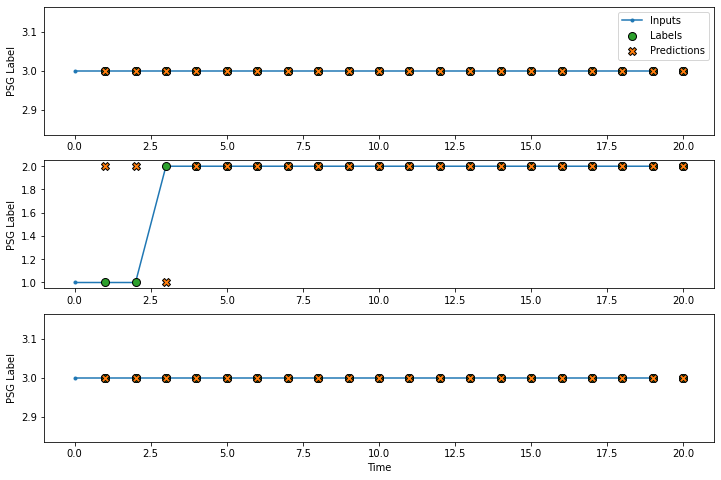

In [ ]:
wide_window.plot(lstm_model)

## Evaluation of Single-step Model Performance

We can now look at how the performance of all our models compares. 

Our baseline model performed seemingly very well, however its results are not very useful in practice and the model would probably not generalise well. Each of our trainable single-step models and two of the multi-step models make similarly useless predictions of the modal class in the dataset. 

Our LSTM model therfore is the most accurate single-step model, achieving accuracy of approx. 84%.

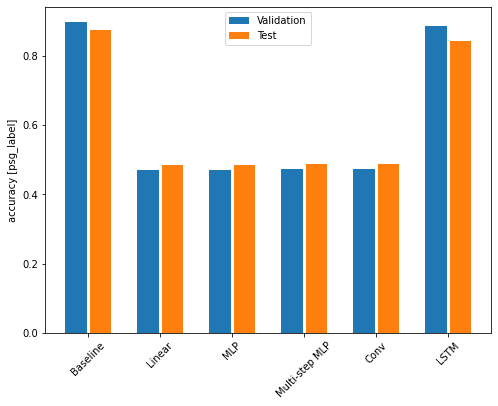

In [ ]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'accuracy'
metric_index = lstm_model.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('accuracy [psg_label]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

Below, we diplay the accuracy of each model on the test set.

In [ ]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.8729
Linear      : 0.4851
MLP         : 0.4851
Multi-step MLP: 0.4866
Conv        : 0.4866
LSTM        : 0.8438


---
---

# 6. Multi-step Output Models

---
---

All of the models in the previous sections made single time step predictions, 30s into the future. We now intend to look at expanding these models to make multiple time step predictions.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single-step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values. A common approach to this is with single-shot predictions where the entire time series is predicted at once.

In this section, all of the models will attempt to predict the *psg_label* feature across all output time steps.

For the multi-step model, the training data again consists of 30s samples. However, here, the models will learn to predict 30 mins of the future, given 30 mins of the past.

Here is a Window object that generates these slices from the dataset:

Total window size: 120
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Label indices: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
Label column name(s): ['psg_label']
ID column name(s): ['subject_id']

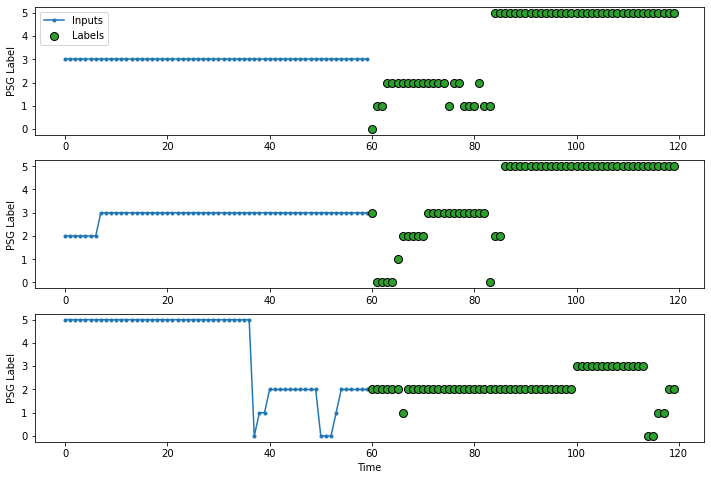

In [ ]:
OUT_STEPS = 60
multi_window = WindowGenerator(input_width=60,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, 
                               label_columns=["psg_label"], id_columns=["subject_id"])

multi_window.plot()
multi_window

In [ ]:
num_classes = 6

## Baseline

We have two types of baseline models this time. Our first model is similar to the baseline used above, where it simply predicts the last known sleep label for the required number of output time steps.

141/141 [==============================] - 1s 4ms/step - loss: 1.4054 - accuracy: 0.4768


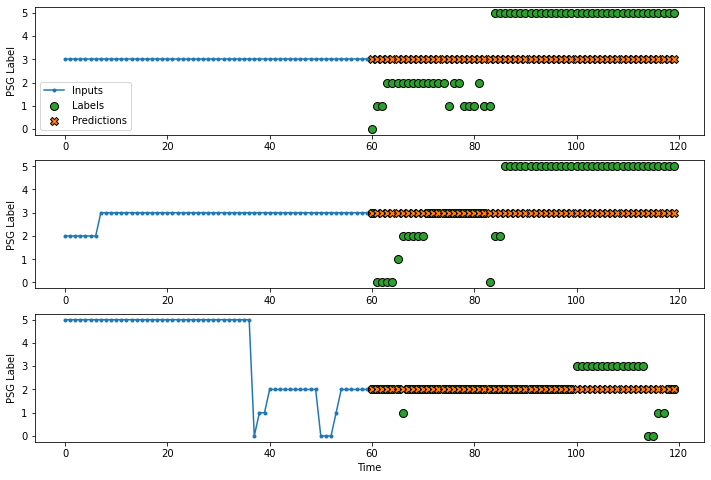

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def __init__(self, label_index):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    last = inputs[:, -1:, self.label_index] # last value
    results = tf.tile(last, [1, OUT_STEPS]) # repeat
    return  tf.one_hot(tf.cast(results, tf.uint8), 6) # one-hot

last_baseline = MultiStepLastBaseline(-1)
last_baseline.compile(loss=focal(2),
                      metrics=["accuracy"])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

Our second baseline model duplicates the entire input sequence across the output sequence. This may be useful if the data shows a cyclical pattern.

141/141 [==============================] - 1s 5ms/step - loss: 1.9646 - accuracy: 0.2687


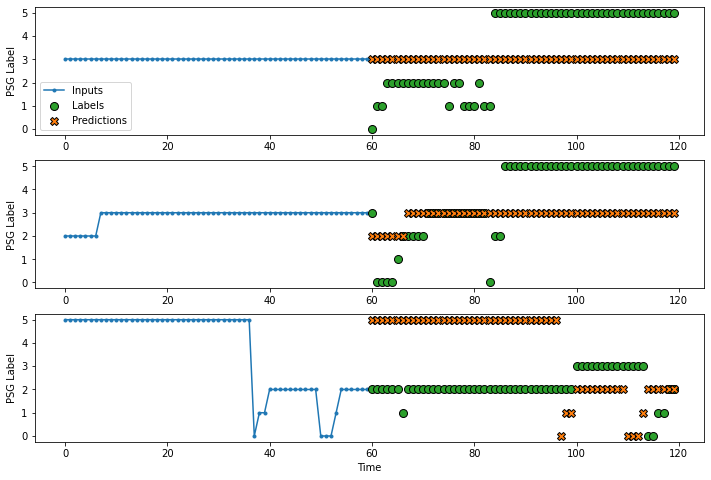

In [ ]:
class RepeatBaseline(tf.keras.Model):
  def __init__(self, label_index):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    results = inputs[..., self.label_index]
    return tf.one_hot(tf.cast(results, tf.uint8), num_classes) # one-hot

repeat_baseline = RepeatBaseline(-1)
repeat_baseline.compile(loss=focal(2),
                        metrics=["accuracy"])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

From the accuracy achieved by this repeat baseline model, it is clear that the sleep data has no cyclical pattern.

One high level approach to this problem is use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

## Linear

We can once again employ a simple linear model. This takes the last timestamp in our input sequence, and predicts all of the future values at once. The model needs to predict all of the output time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior and so is underpowered but it is no harm to see how it performs on the data regardless.

Epoch 1/20
492/492 [==============================] - 4s 8ms/step - loss: 0.1468 - accuracy: 0.4691 - val_loss: 0.1288 - val_accuracy: 0.4941
Epoch 2/20
492/492 [==============================] - 4s 7ms/step - loss: 0.1204 - accuracy: 0.5312 - val_loss: 0.1226 - val_accuracy: 0.5117
Epoch 3/20
492/492 [==============================] - 4s 7ms/step - loss: 0.1148 - accuracy: 0.5547 - val_loss: 0.1198 - val_accuracy: 0.5265
Epoch 4/20
492/492 [==============================] - 4s 7ms/step - loss: 0.1120 - accuracy: 0.5692 - val_loss: 0.1181 - val_accuracy: 0.5374
Epoch 5/20
492/492 [==============================] - 4s 8ms/step - loss: 0.1101 - accuracy: 0.5749 - val_loss: 0.1170 - val_accuracy: 0.5416
Epoch 6/20
492/492 [==============================] - 4s 7ms/step - loss: 0.1090 - accuracy: 0.5788 - val_loss: 0.1164 - val_accuracy: 0.5448
Epoch 7/20
492/492 [==============================] - 4s 7ms/step - loss: 0.1082 - accuracy: 0.5817 - val_loss: 0.1157 - val_accuracy: 0.5462
Epoch 

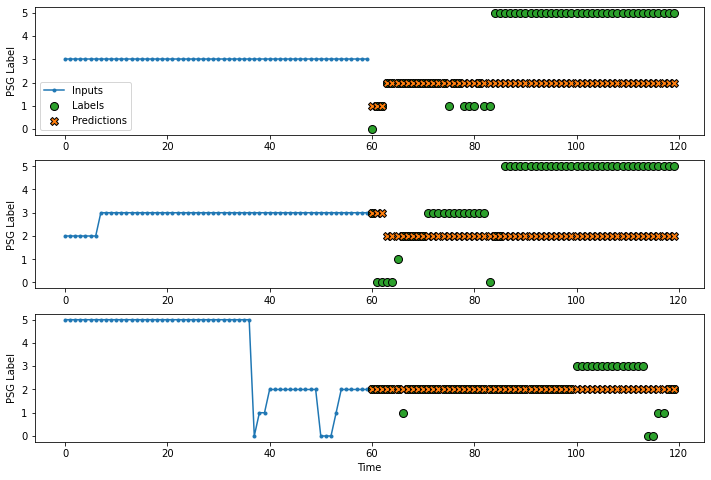

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS * num_classes),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()

])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

## Multi-Layer Perceptron

With our MLP model, we still only use the final timestep and predict all future values. The Dense layer which is added between the input and the output gives the linear model more power.

Epoch 1/20
492/492 [==============================] - 5s 10ms/step - loss: 0.1121 - accuracy: 0.5710 - val_loss: 0.1163 - val_accuracy: 0.5392
Epoch 2/20
492/492 [==============================] - 5s 10ms/step - loss: 0.1023 - accuracy: 0.5932 - val_loss: 0.1133 - val_accuracy: 0.5508
Epoch 3/20
492/492 [==============================] - 5s 10ms/step - loss: 0.1004 - accuracy: 0.5960 - val_loss: 0.1111 - val_accuracy: 0.5562
Epoch 4/20
492/492 [==============================] - 5s 10ms/step - loss: 0.0992 - accuracy: 0.5983 - val_loss: 0.1089 - val_accuracy: 0.5630
Epoch 5/20
492/492 [==============================] - 5s 10ms/step - loss: 0.0986 - accuracy: 0.5990 - val_loss: 0.1082 - val_accuracy: 0.5664
Epoch 6/20
492/492 [==============================] - 5s 10ms/step - loss: 0.0975 - accuracy: 0.6042 - val_loss: 0.1067 - val_accuracy: 0.5667
Epoch 7/20
492/492 [==============================] - 5s 10ms/step - loss: 0.0969 - accuracy: 0.6090 - val_loss: 0.1061 - val_accuracy: 0.5602

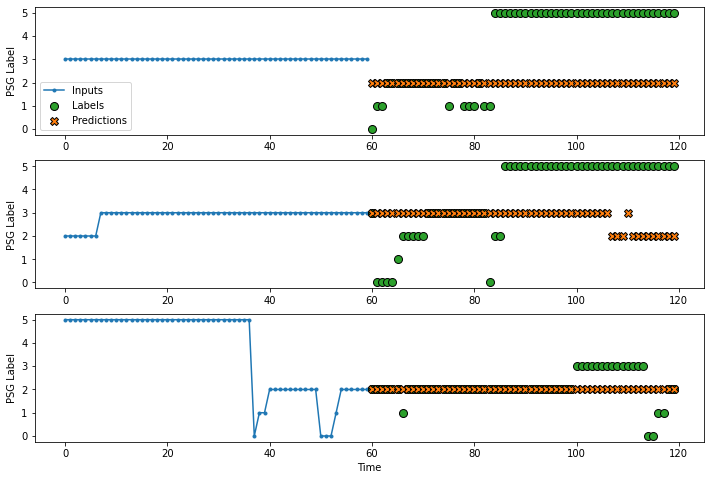

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*classes]
    tf.keras.layers.Dense(OUT_STEPS*num_classes),
    # Shape => [batch, out_steps, classes]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

This extra Dense layers yields a 3% improvement in accuracy on the validation set compared to the linear model.

## Convolutional Neural Network

A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense and linear models since it can see how things are changing over time.

Epoch 1/20
492/492 [==============================] - 4s 9ms/step - loss: 0.1116 - accuracy: 0.5647 - val_loss: 0.1295 - val_accuracy: 0.5185
Epoch 2/20
492/492 [==============================] - 4s 9ms/step - loss: 0.1033 - accuracy: 0.5903 - val_loss: 0.1280 - val_accuracy: 0.5295
Epoch 3/20
492/492 [==============================] - 4s 9ms/step - loss: 0.1007 - accuracy: 0.5951 - val_loss: 0.1198 - val_accuracy: 0.5373
Epoch 4/20
492/492 [==============================] - 4s 9ms/step - loss: 0.0986 - accuracy: 0.6015 - val_loss: 0.1200 - val_accuracy: 0.5510
Epoch 5/20
492/492 [==============================] - 4s 9ms/step - loss: 0.0977 - accuracy: 0.6046 - val_loss: 0.1191 - val_accuracy: 0.5490
Epoch 6/20
492/492 [==============================] - 4s 9ms/step - loss: 0.0965 - accuracy: 0.6088 - val_loss: 0.1157 - val_accuracy: 0.5482
Epoch 7/20
492/492 [==============================] - 4s 9ms/step - loss: 0.0961 - accuracy: 0.6090 - val_loss: 0.1150 - val_accuracy: 0.5443
Epoch 

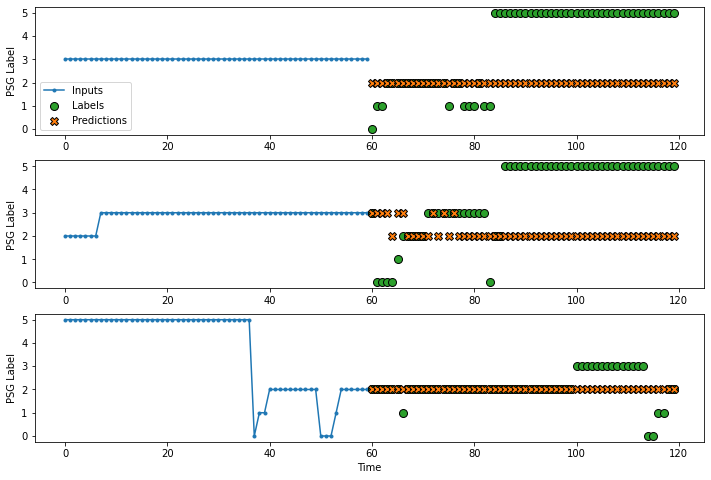

In [ ]:
CONV_WIDTH = 10
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*classes]
    tf.keras.layers.Dense(OUT_STEPS*num_classes),
    # Shape => [batch, out_steps, classes]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

## Recurrent Neural Network

A recurrent model can learn to use a long history of inputs, if it's relevant to the predictions the model is making. Here the model will accumulate an internal state for 30 minutes, before making a single prediction for the next 30 minutes. This is facilitated by the previously defined multi_window object.

In this single-shot format, the LSTM only needs to produce an output at the last time step, so we can set return_sequences = False.

Epoch 1/20
492/492 [==============================] - 15s 30ms/step - loss: 0.1240 - accuracy: 0.5102 - val_loss: 0.1202 - val_accuracy: 0.5373
Epoch 2/20
492/492 [==============================] - 14s 29ms/step - loss: 0.1086 - accuracy: 0.5726 - val_loss: 0.1142 - val_accuracy: 0.5434
Epoch 3/20
492/492 [==============================] - 14s 29ms/step - loss: 0.1039 - accuracy: 0.5841 - val_loss: 0.1112 - val_accuracy: 0.5501
Epoch 4/20
492/492 [==============================] - 15s 30ms/step - loss: 0.1010 - accuracy: 0.5922 - val_loss: 0.1078 - val_accuracy: 0.5530
Epoch 5/20
492/492 [==============================] - 15s 30ms/step - loss: 0.0983 - accuracy: 0.6024 - val_loss: 0.1071 - val_accuracy: 0.5621
Epoch 6/20
492/492 [==============================] - 14s 29ms/step - loss: 0.0961 - accuracy: 0.6064 - val_loss: 0.1056 - val_accuracy: 0.5722
Epoch 7/20
492/492 [==============================] - 15s 31ms/step - loss: 0.0942 - accuracy: 0.6169 - val_loss: 0.1050 - val_accuracy:

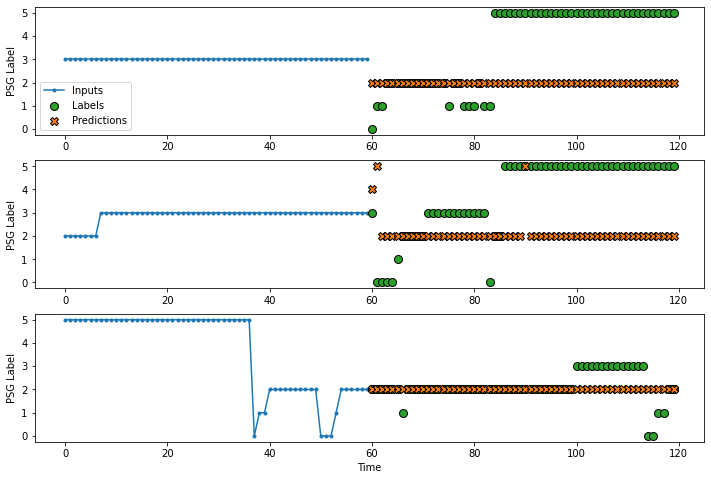

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_classes),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()
])

compile_and_fit(multi_lstm_model, multi_window)

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

The RNN as expected produces the best results on the validation set, yielding an accuracy of approx. 60%.

## Evaluation of Model Performance

To visualise the performance of the different models on the validation and test sets, we create a plot:

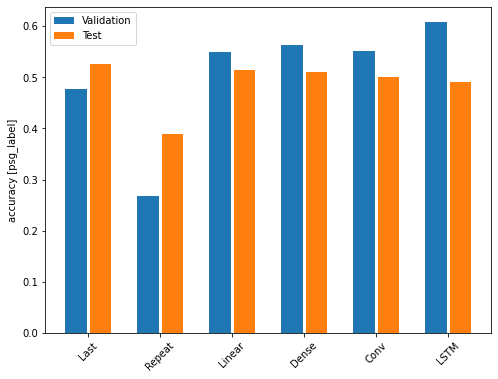

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3
metric_name = 'accuracy'
metric_index = lstm_model.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.ylabel('accuracy [psg_label]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
_ = plt.legend()

The accuracy of the models on the validation set generally improved as more complex models were used. However, surprisingly, the accuracy achieved for the test data is very similar across all the models.

Experimenting with different sets of features and different input and output sizes may yield better results. Below, we carry out some experiments in this regard.

---
---

# 7. Experiments

---
---

The above testing of different prediction models points out to us that the LSTM model is a slightly better prediction model than the others as it gives us an validation accuracy score of around 60% through its multi-step predictions. As a result, we will proceed with this model for the purpose of the few experiments we wanted to run.

In these experiments, we will try running this model using different data and configurations to see how this effects the accuracy of the prediction. There are 3 experiments in particular that we want to run to see how they affect the accuracy of the prediction, they are:

1.   Using the cropped features Vs the features used by the paper authors
2.   Using data with a standardised time feature Vs an unstandardised time feature
3.   Using different input and output sizes of the number of time periods the model takes in and the number of time periods the model predicts

Over the course of these experiments, we will use the accuracy metrics output by the LSTM model in the above tests as the baseline for comparison. This model was trained using:

1.   Only the features used by the author
2.   With a standardised time feature
3.   With a ratio of the number of input time intervals to the number of prediction time intervals of 1:1

We will test all three of these assumptions to try figure out if taking the approach we took was actually the best approach.

#### Store the results of the LSTM baseline model in a dictionary

In [ ]:
# these experiment dictionaries are for later use upon experimenting with different data and configurations
experiments_val_performance = {}
expermients_performance = {}
experiments_val_performance['LSTM_baseline'] = multi_lstm_model.evaluate(multi_window.val)
expermients_performance['LSTM_baseline'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)

141/141 [==============================] - 1s 10ms/step - loss: 0.0987 - accuracy: 0.6073


---

## Experiment 1 - Cropped features VS Authors features

---

When testing different prediction models, we proceeded using only the features used by Walch et al in their paper [1] so to test this approach against using the features in the cropped dataset, we will re-run these same steps using this new data.


In [ ]:
experiment_1_val_performance = experiments_val_performance.copy()
expermient_1_performance = expermients_performance.copy()

#### Generate the window using the cropped data

(Total window size: 120
 Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59]
 Label indices: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
   78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
   96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
  114 115 116 117 118 119]
 Input column name(s): ['time', 'heart_rate', 'x_motion', 'y_motion', 'z_motion', 'step_count', 'psg_label']
 Label column name(s): ['psg_label']
 ID column name(s): ['subject_id'],)

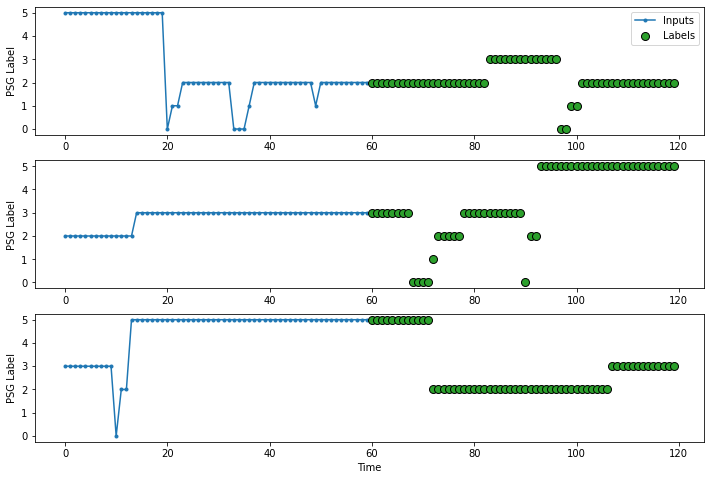

In [ ]:
OUT_STEPS = 60
cropped_multi_window = WindowGenerator(input_width=60,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=cropped_train_df,
                               val_df=cropped_val_df,
                               test_df=cropped_test_df,
                               label_columns=["psg_label"],
                               id_columns=["subject_id"])

cropped_multi_window.plot()
cropped_multi_window,

### Create the model using this cropped data

Epoch 1/20
492/492 [==============================] - 15s 31ms/step - loss: 0.1256 - accuracy: 0.5233 - val_loss: 0.1264 - val_accuracy: 0.5318
Epoch 2/20
492/492 [==============================] - 15s 31ms/step - loss: 0.1086 - accuracy: 0.5716 - val_loss: 0.1301 - val_accuracy: 0.5303
Epoch 3/20
492/492 [==============================] - 15s 30ms/step - loss: 0.1060 - accuracy: 0.5820 - val_loss: 0.1325 - val_accuracy: 0.5191
Epoch 4/20
492/492 [==============================] - 15s 31ms/step - loss: 0.1031 - accuracy: 0.5788 - val_loss: 0.1191 - val_accuracy: 0.5479
Epoch 5/20
492/492 [==============================] - 16s 32ms/step - loss: 0.0983 - accuracy: 0.5851 - val_loss: 0.1175 - val_accuracy: 0.5549
Epoch 6/20
492/492 [==============================] - 15s 31ms/step - loss: 0.0943 - accuracy: 0.5963 - val_loss: 0.1219 - val_accuracy: 0.5564
Epoch 7/20
492/492 [==============================] - 16s 33ms/step - loss: 0.0920 - accuracy: 0.6080 - val_loss: 0.1202 - val_accuracy:

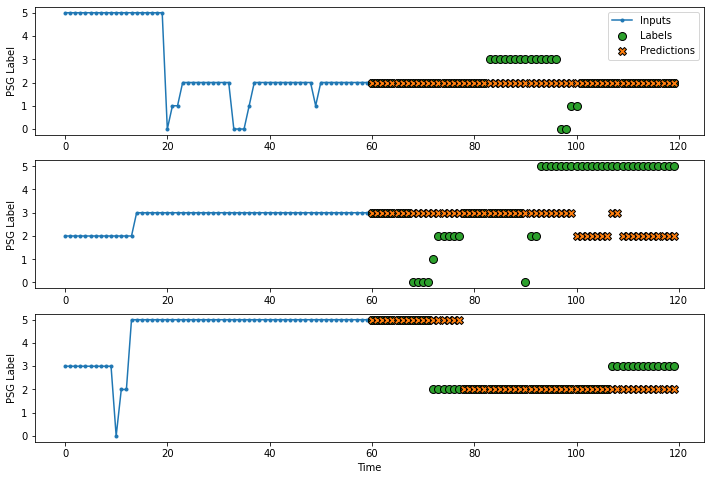

In [ ]:
cropped_multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_classes),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()
])

compile_and_fit(cropped_multi_lstm_model, cropped_multi_window)

experiment_1_val_performance['LSTM_cropped'] = cropped_multi_lstm_model.evaluate(cropped_multi_window.val)
expermient_1_performance['LSTM_cropped'] = cropped_multi_lstm_model.evaluate(cropped_multi_window.test, verbose=0)
cropped_multi_window.plot(cropped_multi_lstm_model)

### Plot the results of this model in comparison to the baseline

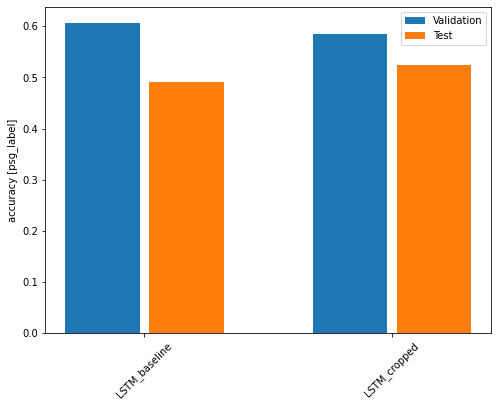

In [ ]:
x = np.arange(len(expermient_1_performance))
width = 0.3
metric_name = 'accuracy'
metric_index = lstm_model.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in experiment_1_val_performance.values()]
test_mae = [v[metric_index] for v in expermient_1_performance.values()]

plt.ylabel('accuracy [psg_label]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=expermient_1_performance.keys(), rotation=45)
_ = plt.legend()

This experiment showed that using the cropped data actually improved performance on the test set for the LSTM model. This is slightly surprising as we expected to see better results using the features proposed by Walch et al. 

This could be attributed to the fact that the acceleration feature is aggregated in Walch et al.'s proposal as opposed to being left in it's constituent parts in the cropped data.

---

## Experiment 2 - Standardised time feature Vs Unstandardised time feature

---

This experiment is to test whether standardising the time feature was the best thing to do or whether it would be better if this was unstandardised.
In the data prep, we created an alternate version of the train, validation and test sets where we didn't standardise the time feature so we can use this to run our experiment.

In [ ]:
experiment_2_val_performance = experiments_val_performance.copy()
expermient_2_performance = expermients_performance.copy()

#### Read in the alternatively standardised data

In [ ]:
alt_std_cropped_and_author_train_df = pd.read_csv('std_2_train.csv', header=0)
alt_std_cropped_and_author_val_df = pd.read_csv('std_2_val.csv', header=0)
alt_std_cropped_and_author_test_df = pd.read_csv('std_2_test.csv', header=0)

#### Subset this to just have the features used by the author

In [ ]:
alt_std_author_train_df = alt_std_cropped_and_author_train_df[author_features]
alt_std_author_val_df = alt_std_cropped_and_author_val_df[author_features]
alt_std_author_test_df = alt_std_cropped_and_author_test_df[author_features]

#### Generate the window using the alternatively standardised data

(Total window size: 120
 Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
  48 49 50 51 52 53 54 55 56 57 58 59]
 Label indices: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
   78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
   96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
  114 115 116 117 118 119]
 Input column name(s): ['time_feature', 'heart_rate_feature', 'cosine_feature', 'count_feature', 'psg_label']
 Label column name(s): ['psg_label']
 ID column name(s): ['subject_id'],)

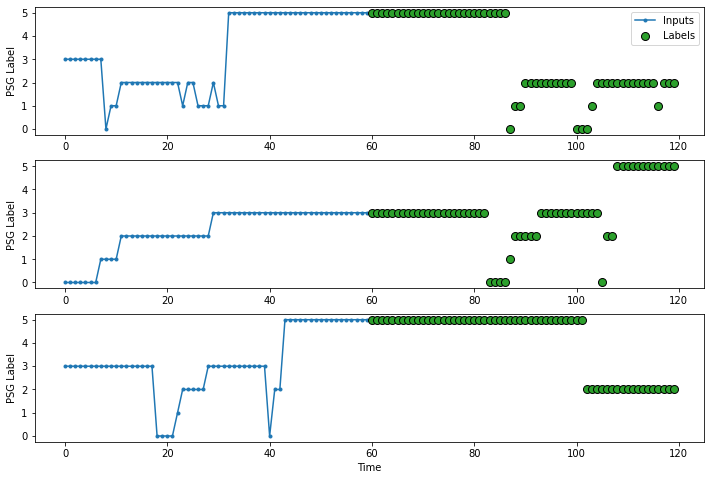

In [ ]:
OUT_STEPS = 60
alt_std_multi_window = WindowGenerator(input_width=60,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,
                               train_df=alt_std_author_train_df,
                               val_df=alt_std_author_val_df,
                               test_df=alt_std_author_test_df,
                               label_columns=["psg_label"],
                               id_columns=["subject_id"])

alt_std_multi_window.plot()
alt_std_multi_window,

### Create the model using this alternatively standardised data

Epoch 1/20
492/492 [==============================] - 14s 29ms/step - loss: 0.1200 - accuracy: 0.5443 - val_loss: 0.1188 - val_accuracy: 0.5368
Epoch 2/20
492/492 [==============================] - 14s 29ms/step - loss: 0.1032 - accuracy: 0.5898 - val_loss: 0.1145 - val_accuracy: 0.5521
Epoch 3/20
492/492 [==============================] - 16s 32ms/step - loss: 0.1036 - accuracy: 0.5910 - val_loss: 0.1084 - val_accuracy: 0.5571
Epoch 4/20
492/492 [==============================] - 16s 34ms/step - loss: 0.0995 - accuracy: 0.6043 - val_loss: 0.1075 - val_accuracy: 0.5606
Epoch 5/20
492/492 [==============================] - 14s 29ms/step - loss: 0.0961 - accuracy: 0.6080 - val_loss: 0.1022 - val_accuracy: 0.5698
Epoch 6/20
492/492 [==============================] - 15s 30ms/step - loss: 0.0932 - accuracy: 0.6201 - val_loss: 0.1003 - val_accuracy: 0.5886
Epoch 7/20
492/492 [==============================] - 15s 30ms/step - loss: 0.0921 - accuracy: 0.6199 - val_loss: 0.1043 - val_accuracy:

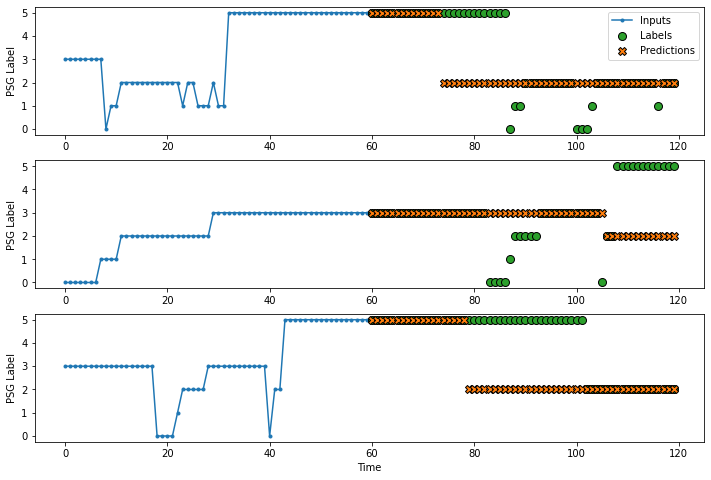

In [ ]:
alt_std_multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_classes),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
    tf.keras.layers.Softmax()
])

compile_and_fit(alt_std_multi_lstm_model, alt_std_multi_window)

experiment_2_val_performance['LSTM_alt_standardised'] = alt_std_multi_lstm_model.evaluate(alt_std_multi_window.val)
expermient_2_performance['LSTM_alt_standardised'] = alt_std_multi_lstm_model.evaluate(alt_std_multi_window.test, verbose=0)
alt_std_multi_window.plot(alt_std_multi_lstm_model)

### Plot the results of this model in comparison to the baseline

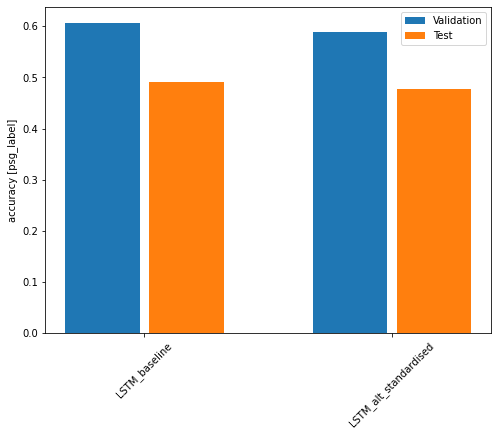

In [ ]:
x = np.arange(len(expermient_2_performance))
width = 0.3
metric_name = 'accuracy'
metric_index = lstm_model.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in experiment_2_val_performance.values()]
test_mae = [v[metric_index] for v in expermient_2_performance.values()]

plt.ylabel('accuracy [psg_label]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=expermient_2_performance.keys(), rotation=45)
_ = plt.legend()

This experiment showed that we were correct to standardise the time feature along with the others before training our models. It's something which we were unsure of so this experiment validated our choice accordingly.

---

## Experiment 3 - Using different ratio of number of input time intervals to number of predicted time intervals

---

With this experiment, we want to use different ratios of the number of input time intervals to the model and the number of predicted time intervals by the model. In our baseline, this ratio was 1:1 but here we will iterate through and test out ratios defined in the list below.

In [ ]:
experiment_3_val_performance = experiments_val_performance.copy()
expermient_3_performance = expermients_performance.copy()

ratios = [(0.5, 1), (2, 1), (3, 1), (5, 1), (10, 1)]

#### Create function to generate the window and create the model using the alternatively standardised data

In [ ]:
def generate_window_and_create_model(num_inputs, num_outputs, name):
  
    OUT_STEPS = num_outputs
    multi_window = WindowGenerator(input_width=num_inputs,
                                  label_width=OUT_STEPS,
                                  shift=OUT_STEPS,
                                  label_columns=["psg_label"],
                                  id_columns=["subject_id"])


    multi_lstm_model = tf.keras.Sequential([
        # Shape [batch, time, features] => [batch, lstm_units]
        # Adding more `lstm_units` just overfits more quickly.
        tf.keras.layers.LSTM(32, return_sequences=False),
        # Shape => [batch, out_steps*features]
        tf.keras.layers.Dense(OUT_STEPS*num_classes),
        # Shape => [batch, out_steps, features]
        tf.keras.layers.Reshape([OUT_STEPS, num_classes]),
        tf.keras.layers.Softmax()
    ])

    compile_and_fit(multi_lstm_model, multi_window)

    experiment_3_val_performance[f'LSTM_{name}'] = multi_lstm_model.evaluate(multi_window.val)
    expermient_3_performance[f'LSTM_{name}'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
    multi_window.plot(multi_lstm_model)

### Create models using different input/output ratios

Epoch 1/20
513/513 [==============================] - 10s 20ms/step - loss: 0.1203 - accuracy: 0.5260 - val_loss: 0.1186 - val_accuracy: 0.5267
Epoch 2/20
513/513 [==============================] - 10s 20ms/step - loss: 0.1070 - accuracy: 0.5689 - val_loss: 0.1145 - val_accuracy: 0.5447
Epoch 3/20
513/513 [==============================] - 10s 19ms/step - loss: 0.1028 - accuracy: 0.5852 - val_loss: 0.1103 - val_accuracy: 0.5547
Epoch 4/20
513/513 [==============================] - 11s 22ms/step - loss: 0.1002 - accuracy: 0.5987 - val_loss: 0.1093 - val_accuracy: 0.5555
Epoch 5/20
513/513 [==============================] - 10s 20ms/step - loss: 0.0976 - accuracy: 0.6053 - val_loss: 0.1068 - val_accuracy: 0.5683
Epoch 6/20
513/513 [==============================] - 10s 19ms/step - loss: 0.0949 - accuracy: 0.6099 - val_loss: 0.1077 - val_accuracy: 0.5767
Epoch 7/20
513/513 [==============================] - 10s 19ms/step - loss: 0.0932 - accuracy: 0.6152 - val_loss: 0.1053 - val_accuracy:

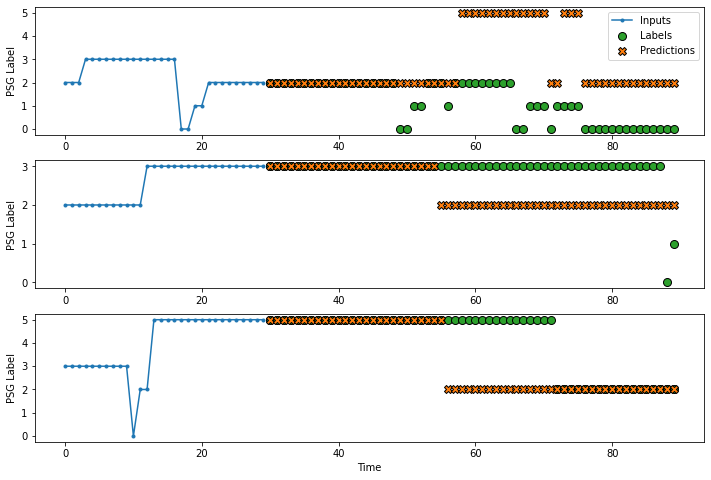

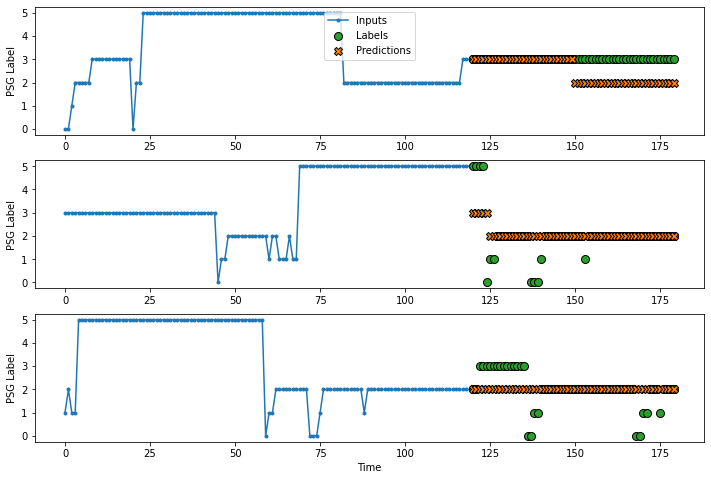

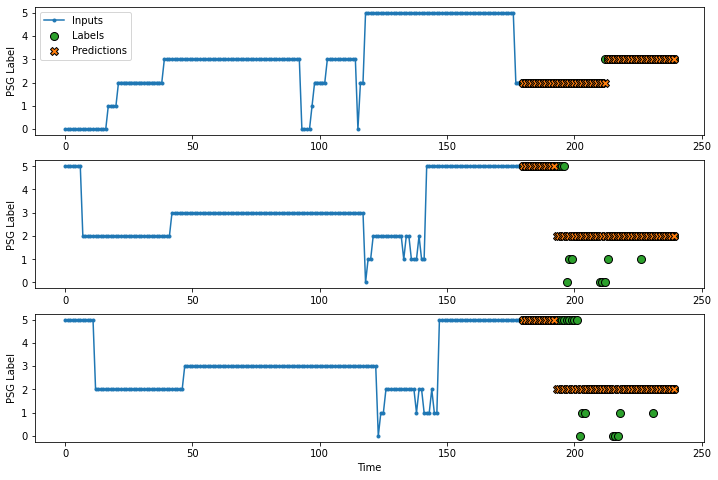

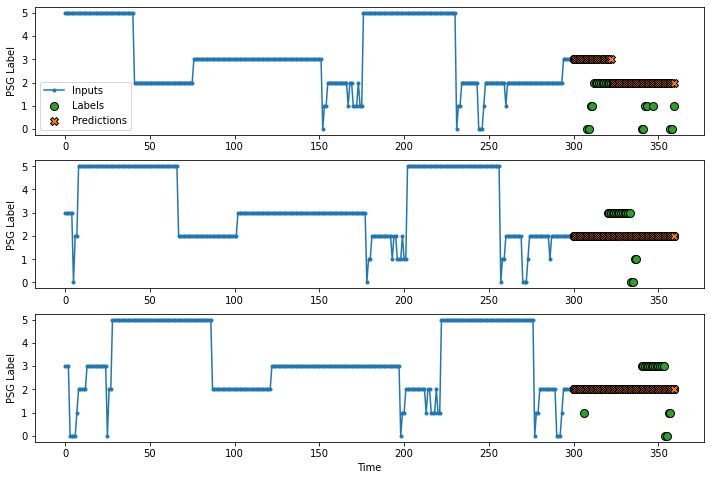

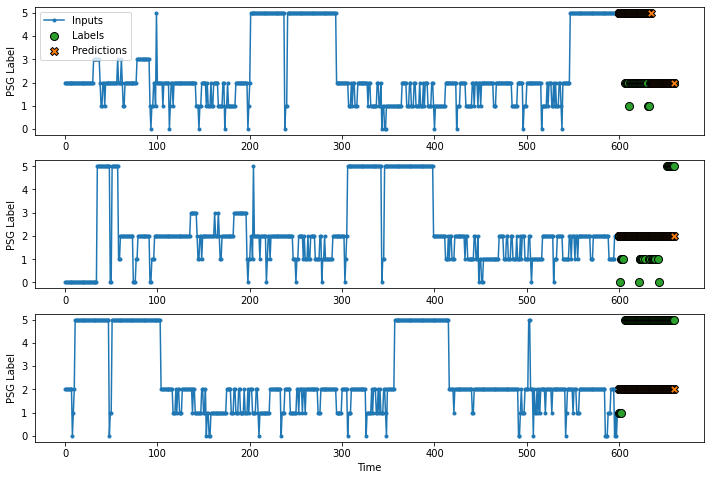

In [ ]:
for i, (input_width, output_width) in enumerate(ratios):
  input_width, output_width = input_width * 60, output_width * 60
  generate_window_and_create_model(int(input_width), int(output_width), i)

### Plot the results of this model in comparison to the baseline

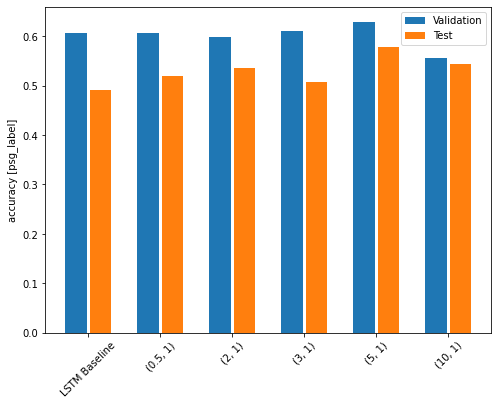

In [ ]:
x = np.arange(len(expermient_3_performance))
width = 0.3
metric_name = 'accuracy'
metric_index = lstm_model.metrics_names.index('accuracy')
val_mae = [v[metric_index] for v in experiment_3_val_performance.values()]
test_mae = [v[metric_index] for v in expermient_3_performance.values()]

plt.ylabel('accuracy [psg_label]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=['LSTM Baseline'] + ratios, rotation=45)
_ = plt.legend()

Naturally, as the ratio of input to output time steps increased, so did the accuracy on the test set. The best accuracy was actually achieved for a 5:1 ratio. Accuracy improvement on the test set diminished when this ratio increased to 10:1 and beyond; somewhere around a 5:1 ratio appeared to be the sweet-spot.

---
---

# References

---
---


**1.**  O Walch, Y Huang, D Forger, C Goldstein, Sleep stage prediction with raw acceleration and photoplethysmography heart rate data derived from a consumer wearable device, 2019. DOI: 10.1093/sleep/zsz180

**2.**  BH te Lindert, et al. Sleep estimates using microelectromechanical systems (MEMS), 2012. DOI: 10.5665/sleep.2648

**3.** TY Lin, P Goyal, R Girshick, K He, P Dollár, Focal Loss for Dense Object Detection, 2018. DOI: 10.1109/iccv.2017.324